In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime as dt
import numpy as np
import copy
import seaborn as sns

## Reading excel file


In [3]:
xls = pd.ExcelFile('data.xlsx')

## Reading individual Sheets

In [4]:
# Industrialisation DataFrame
ind = pd.read_excel(xls, 'industrialisation')
ind.head()
ind.shape

(2840, 30)

In [5]:
# CO2 dataframe
co2 = pd.read_excel(xls, 'Co2')
co2

,Entity,Code,Year,Annual CO2 emissions (tonnes )
0,Afghanistan,AFG,1949,14656.00
1,Afghanistan,AFG,1950,84272.00
2,Afghanistan,AFG,1951,91600.00
3,Afghanistan,AFG,1952,91600.00
4,Afghanistan,AFG,1953,106256.00
...,...,...,...,...
20848,Zimbabwe,ZWE,2013,11536239.29
20849,Zimbabwe,ZWE,2014,11866348.41
20850,Zimbabwe,ZWE,2015,10907603.94
20851,Zimbabwe,ZWE,2016,9932649.88


In [6]:
co2.shape

(20853, 4)

In [7]:
# Global Temps Dataframe
gltemp = pd.read_excel(xls, 'GlobalLandTemperaturesByCity')
gltemp.head()
gltemp.shape

(1048575, 7)

## Cleaning the DFs

### Cleaning Global Temps By City

In [8]:
gltemp.isna().sum()

dt                                   0
AverageTemperature               47547
AverageTemperatureUncertainty    47547
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [9]:
gltemp.iloc[798583]['dt']

datetime.datetime(1900, 7, 1, 0, 0)

In [10]:
gltemp = gltemp.dropna()

In [11]:
gltemp.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [12]:
print(gltemp.iloc[798580])

dt                               1987-07-01 00:00:00
AverageTemperature                             22.97
AverageTemperatureUncertainty                  0.207
City                                           Benxi
Country                                        China
Latitude                                      40.99N
Longitude                                    123.55E
Name: 836224, dtype: object


In [13]:
gltemp = gltemp.reset_index()

In [14]:
del gltemp['index']

In [15]:
gltemp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Ã…rhus,Denmark,57.05N,10.33E
1,1744-04-01,5.788,3.624,Ã…rhus,Denmark,57.05N,10.33E
2,1744-05-01,10.644,1.283,Ã…rhus,Denmark,57.05N,10.33E
3,1744-06-01,14.051,1.347,Ã…rhus,Denmark,57.05N,10.33E
4,1744-07-01,16.082,1.396,Ã…rhus,Denmark,57.05N,10.33E


In [16]:
gltemp['dt'] = pd.to_datetime(gltemp['dt'])


In [17]:
gltemp.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Ã…rhus,Denmark,57.05N,10.33E
1,1744-04-01,5.788,3.624,Ã…rhus,Denmark,57.05N,10.33E
2,1744-05-01,10.644,1.283,Ã…rhus,Denmark,57.05N,10.33E
3,1744-06-01,14.051,1.347,Ã…rhus,Denmark,57.05N,10.33E
4,1744-07-01,16.082,1.396,Ã…rhus,Denmark,57.05N,10.33E


In [18]:
gltemp = gltemp[gltemp['dt'] > pd.Timestamp(year=1989, day=31, month=12)]

In [19]:
gltemp.head()
gltemp.shape

(119879, 7)

In [20]:
gltemp = gltemp.reset_index(drop=True)

In [21]:
gltemp['dt'] = gltemp['dt'].dt.year
gltemp

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1990,4.267,0.459,Ã…rhus,Denmark,57.05N,10.33E
1,1990,5.895,0.460,Ã…rhus,Denmark,57.05N,10.33E
2,1990,6.565,0.299,Ã…rhus,Denmark,57.05N,10.33E
3,1990,8.068,0.222,Ã…rhus,Denmark,57.05N,10.33E
4,1990,12.944,0.287,Ã…rhus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
119874,2013,27.745,0.241,Bontang,Indonesia,0.80N,118.13E
119875,2013,27.795,0.258,Bontang,Indonesia,0.80N,118.13E
119876,2013,28.220,0.292,Bontang,Indonesia,0.80N,118.13E
119877,2013,27.127,0.231,Bontang,Indonesia,0.80N,118.13E


In [22]:
# List of countries being analysed
countries = ['India', 'China', 'United States', 'United Kingdom', 'Japan', 'Germany']

country = gltemp[gltemp['Country'].isin(countries)]

In [23]:
country = country.reset_index(drop=True)
country

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1990,-13.093,0.522,ÃœrÃ¼mqi,China,44.20N,87.20E
1,1990,-10.704,0.399,ÃœrÃ¼mqi,China,44.20N,87.20E
2,1990,-0.075,0.469,ÃœrÃ¼mqi,China,44.20N,87.20E
3,1990,9.557,0.249,ÃœrÃ¼mqi,China,44.20N,87.20E
4,1990,17.972,0.285,ÃœrÃ¼mqi,China,44.20N,87.20E
...,...,...,...,...,...,...,...
46026,2013,8.374,0.199,Bonn,Germany,50.63N,6.34E
46027,2013,11.463,0.235,Bonn,Germany,50.63N,6.34E
46028,2013,15.589,0.247,Bonn,Germany,50.63N,6.34E
46029,2013,19.869,0.280,Bonn,Germany,50.63N,6.34E


In [24]:
grouped = country.groupby(['dt', 'Country']).mean()

In [26]:
grouped

AverageTemperature  AverageTemperatureUncertainty
dt   Country                                                          
1990 China                    10.930208                       0.331760
     Germany                   9.785250                       0.289024
     India                    26.033152                       0.395594
     Japan                    14.147424                       0.269750
     United Kingdom           10.101881                       0.279119
...                                 ...                            ...
2013 Germany                   9.141339                       0.279643
     India                    27.179701                       0.512657
     Japan                    13.804729                       0.450458
     United Kingdom            9.156000                       0.434500
     United States            14.929293                       0.387619

[144 rows x 2 columns]

In [28]:
temp = grouped.reset_index()
temp

,dt,Country,AverageTemperature,AverageTemperatureUncertainty
0,1990,China,10.930208,0.331760
1,1990,Germany,9.785250,0.289024
2,1990,India,26.033152,0.395594
3,1990,Japan,14.147424,0.269750
4,1990,United Kingdom,10.101881,0.279119
...,...,...,...,...
139,2013,Germany,9.141339,0.279643
140,2013,India,27.179701,0.512657
141,2013,Japan,13.804729,0.450458
142,2013,United Kingdom,9.156000,0.434500


### Cleaning the co2 dataset

In [30]:
country = co2[co2['Entity'].isin(countries)]

In [31]:
co2 = country.reset_index(drop=True)

In [32]:
co2

,Entity,Code,Year,Annual CO2 emissions (tonnes )
0,China,CHN,1751,0.000000e+00
1,China,CHN,1752,0.000000e+00
2,China,CHN,1753,0.000000e+00
3,China,CHN,1754,0.000000e+00
4,China,CHN,1755,0.000000e+00
...,...,...,...,...
1415,United States,USA,2013,5.519613e+09
1416,United States,USA,2014,5.568759e+09
1417,United States,USA,2015,5.420804e+09
1418,United States,USA,2016,5.310861e+09


In [33]:
co2 = co2[co2['Year'] > 1989]

In [34]:
del co2['Code']
co2

,Entity,Year,Annual CO2 emissions (tonnes )
226,China,1990,2.420302e+09
227,China,1991,2.538924e+09
228,China,1992,2.657112e+09
229,China,1993,2.835795e+09
230,China,1994,3.010242e+09
...,...,...,...
1415,United States,2013,5.519613e+09
1416,United States,2014,5.568759e+09
1417,United States,2015,5.420804e+09
1418,United States,2016,5.310861e+09


In [35]:
co2_g = co2.groupby(['Year', 'Entity']).mean()
co2_g

Annual CO2 emissions (tonnes )
Year Entity                                        
1990 China                             2.420302e+09
     Germany                           1.012902e+09
     India                             6.165791e+08
     Japan                             1.155263e+09
     United Kingdom                    6.010676e+08
...                                             ...
2017 Germany                           7.993732e+08
     India                             2.466765e+09
     Japan                             1.205061e+09
     United Kingdom                    3.847068e+08
     United States                     5.269530e+09

[168 rows x 1 columns]

# industrialization dataframe

In [36]:
country = ind[ind['Country Name'].isin(countries)]

In [37]:
ind = country.reset_index(drop=True)

In [38]:
ind

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,1990,1991,1992,1993,1994,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,CHN,China,3786,Competitive Industrial Performance Score,Value,0.088960,0.093291,0.100299,0.110058,0.123855,...,0.256939,0.277764,0.297416,0.313759,0.341954,0.360612,0.362264,0.376657,0.378066,0.356159
1,CHN,China,3787,Competitive Industrial Performance Rank,Rank,32.000000,33.000000,31.000000,30.000000,27.000000,...,17.000000,16.000000,12.000000,9.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000
2,CHN,China,3788,Competitive Industrial Performance Quintile,Value,0.700000,0.700000,0.700000,0.700000,0.900000,...,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000
3,CHN,China,3789,Impact of a country on World Manufactures Trade,Value,0.025118,0.025118,0.025118,0.028023,0.032752,...,0.093232,0.103558,0.114255,0.119714,0.129652,0.140085,0.143447,0.156094,0.162601,0.164545
4,CHN,China,3790,Share in world manufacturing exports index,Value,0.170583,0.170583,0.181641,0.215762,0.258881,...,0.810990,0.909162,0.999802,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,USA,United States,3802,Manufactured Exports per capita,Value,1200.451820,1292.108117,1357.289521,1390.028964,1534.043630,...,2321.691730,2657.235782,2920.815071,3178.236048,2292.570345,2770.181976,3137.032070,3225.220141,3231.862861,3269.323814
116,USA,United States,3803,Manufactured Exports per capita index,Value,0.074705,0.080411,0.084469,0.086507,0.094642,...,0.082268,0.087489,0.081631,0.082869,0.076393,0.085108,0.083214,0.090452,0.080208,0.052594
117,USA,United States,3804,Industrial export quality index,Value,0.848574,0.857247,0.857395,0.856469,0.861043,...,0.881568,0.878403,0.872286,0.859803,0.794639,0.781659,0.744058,0.748143,0.741225,0.708612
118,USA,United States,3805,Manufactured Exports share in total exports,Value,0.815927,0.828391,0.829481,0.830081,0.843921,...,0.861052,0.860435,0.848114,0.833288,0.757616,0.770793,0.760074,0.757452,0.754638,0.753809


In [39]:
ind.isna().sum()

Country ISO3         0
Country Name         0
Indicator Id         0
Indicator            0
Subindicator Type    0
1990                 0
1991                 0
1992                 0
1993                 0
1994                 0
1995                 0
1996                 0
1997                 0
1998                 0
1999                 0
2000                 0
2001                 0
2002                 0
2003                 0
2004                 0
2005                 0
2006                 0
2007                 0
2008                 0
2009                 0
2010                 0
2011                 0
2012                 0
2013                 0
2014                 0
dtype: int64

In [40]:
del ind['Country ISO3']
del ind['Indicator Id']
#del ind['Subindicator Type']
ind

,Country Name,Indicator,Subindicator Type,1990,1991,1992,1993,1994,1995,1996,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,China,Competitive Industrial Performance Score,Value,0.088960,0.093291,0.100299,0.110058,0.123855,0.133536,0.136619,...,0.256939,0.277764,0.297416,0.313759,0.341954,0.360612,0.362264,0.376657,0.378066,0.356159
1,China,Competitive Industrial Performance Rank,Rank,32.000000,33.000000,31.000000,30.000000,27.000000,27.000000,25.000000,...,17.000000,16.000000,12.000000,9.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000
2,China,Competitive Industrial Performance Quintile,Value,0.700000,0.700000,0.700000,0.700000,0.900000,0.900000,0.900000,...,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000
3,China,Impact of a country on World Manufactures Trade,Value,0.025118,0.025118,0.025118,0.028023,0.032752,0.034336,0.033401,...,0.093232,0.103558,0.114255,0.119714,0.129652,0.140085,0.143447,0.156094,0.162601,0.164545
4,China,Share in world manufacturing exports index,Value,0.170583,0.170583,0.181641,0.215762,0.258881,0.288280,0.276394,...,0.810990,0.909162,0.999802,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,United States,Manufactured Exports per capita,Value,1200.451820,1292.108117,1357.289521,1390.028964,1534.043630,1709.605923,1796.294990,...,2321.691730,2657.235782,2920.815071,3178.236048,2292.570345,2770.181976,3137.032070,3225.220141,3231.862861,3269.323814
116,United States,Manufactured Exports per capita index,Value,0.074705,0.080411,0.084469,0.086507,0.094642,0.092036,0.093353,...,0.082268,0.087489,0.081631,0.082869,0.076393,0.085108,0.083214,0.090452,0.080208,0.052594
117,United States,Industrial export quality index,Value,0.848574,0.857247,0.857395,0.856469,0.861043,0.856583,0.861895,...,0.881568,0.878403,0.872286,0.859803,0.794639,0.781659,0.744058,0.748143,0.741225,0.708612
118,United States,Manufactured Exports share in total exports,Value,0.815927,0.828391,0.829481,0.830081,0.843921,0.838594,0.836965,...,0.861052,0.860435,0.848114,0.833288,0.757616,0.770793,0.760074,0.757452,0.754638,0.753809


In [41]:
ind_g = ind.groupby(['Country Name', 'Indicator', 'Subindicator Type']).mean()
ind_g

1990  \
Country Name  Indicator                                          Subindicator Type              
China         Competitive Industrial Performance Quintile        Value               0.700000   
              Competitive Industrial Performance Rank            Rank               32.000000   
              Competitive Industrial Performance Score           Value               0.088960   
              Impact of a country on World Manufactures Trade    Value               0.025118   
              Impact of a country on World Manufacturing Valu... Value               0.033536   
...                                                                                       ...   
United States Share of MVA in GDP index                          Value               0.261164   
              Share of Medium and High-Tech Activities in Man... Value               0.871935   
              Share of Medium and High-Tech Activities in Tot... Value               0.747063   
              Share of manufactured exports in total exports ... Value               0.825212   
              Share of world MVA index                           Value               1.000000   

                                                                                         1991  \
Country Name  Indicator                                          Subindicator Type              
China         Competitive Industrial Performance Quintile        Value               0.700000   
              Competitive Industrial Performance Rank            Rank               33.000000   
              Competitive Industrial Performance Score           Value               0.093291   
              Impact of a country on World Manufactures Trade    Value               0.025118   
              Impact of a country on World Manufacturing Valu... Value               0.037863   
...                                                                                       ...   
United States Share of MVA in GDP index                          Value               0.251449   
              Share of Medium and High-Tech Activities in Man... Value               0.875003   
              Share of Medium and High-Tech Activities in Tot... Value               0.705029   
              Share of manufactured exports in total exports ... Value               0.839491   
              Share of world MVA index                           Value               1.000000   

                                                                                         1992  \
Country Name  Indicator                                          Subindicator Type              
China         Competitive Industrial Performance Quintile        Value               0.700000   
              Competitive Industrial Performance Rank            Rank               31.000000   
              Competitive Industrial Performance Score           Value               0.100299   
              Impact of a country on World Manufactures Trade    Value               0.025118   
              Impact of a country on World Manufacturing Valu... Value               0.045071   
...                                                                                       ...   
United States Share of MVA in GDP index                          Value               0.245930   
              Share of Medium and High-Tech Activities in Man... Value               0.870194   
              Share of Medium and High-Tech Activities in Tot... Value               0.688031   
              Share of manufactured exports in total exports ... Value               0.844595   
              Share of world MVA index                           Value               1.000000   

                                                                                         1993  \
Country Name  Indicator                                          Subindicator Type              
China         Competitive Industrial Performance Quintile        Value               0.700000   
            

## Plotting


In [42]:
temp

,dt,Country,AverageTemperature,AverageTemperatureUncertainty
0,1990,China,10.930208,0.331760
1,1990,Germany,9.785250,0.289024
2,1990,India,26.033152,0.395594
3,1990,Japan,14.147424,0.269750
4,1990,United Kingdom,10.101881,0.279119
...,...,...,...,...
139,2013,Germany,9.141339,0.279643
140,2013,India,27.179701,0.512657
141,2013,Japan,13.804729,0.450458
142,2013,United Kingdom,9.156000,0.434500


In [81]:
india = temp[temp['Country'] == 'India']
japan = temp[temp['Country'] == 'Japan']
uk = temp[temp['Country'] == 'United Kingdom']
usa = temp[temp['Country'] == 'United States']
china = temp[temp['Country'] == 'China']
germany = temp[temp['Country'] == 'Germany']

In [61]:
dates = india['dt'].to_list()
dates

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

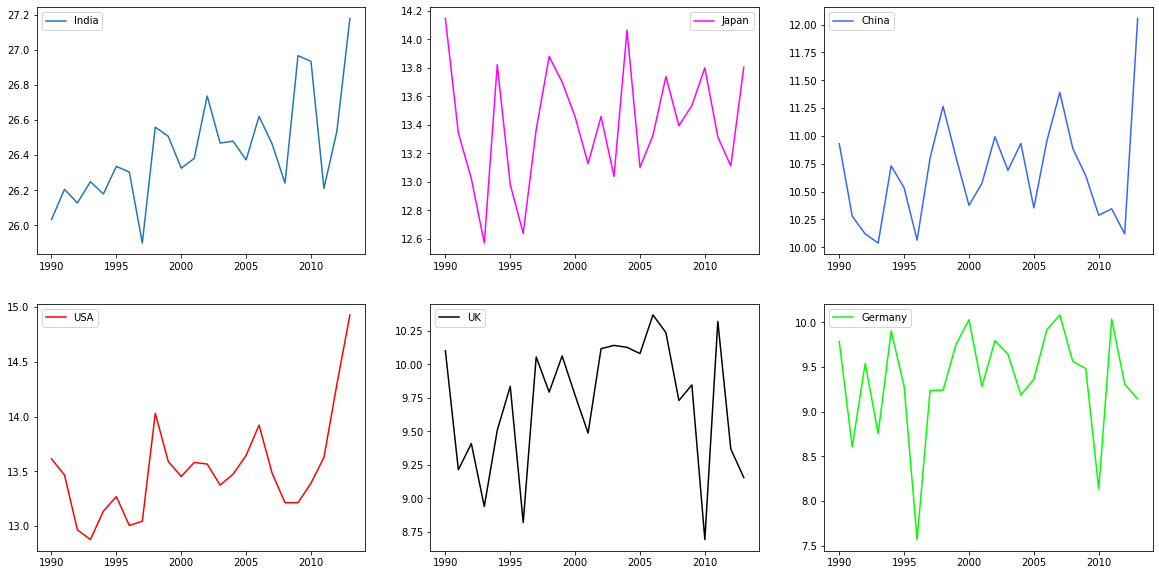

In [95]:
fig, axs = plt.subplots(2, 3, figsize = (20, 10), sharex='col', sharey='row')
plt.subplot(231)
plt.plot(dates, india['AverageTemperature'], label='India')
plt.legend()

plt.subplot(232)
plt.plot(dates, japan['AverageTemperature'], label='Japan', c='#ff00ff')
plt.legend()

plt.subplot(233)
plt.plot(dates, china['AverageTemperature'], label='China', c='#3366ff')
plt.legend()

plt.subplot(234)
plt.plot(dates, usa['AverageTemperature'], label='USA', c='red')
plt.legend()

plt.subplot(235)
plt.plot(dates, uk['AverageTemperature'], label='UK', c='black')
plt.legend()

plt.subplot(236)
plt.plot(dates, germany['AverageTemperature'], label='Germany', c='#00ff00')
plt.legend()